# Sentimental analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
path = './sp500_news_and_sentimental.csv'
df = pd.read_csv(path)
df.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
df

,ticker,date,title,source,link_source,positivity_text,neutrality_text,negativity_text,compound_text,stock,gisc_sectors
0,zts,5/22/2013 2:52:27 PM,Pfizer to spin off Zoetis stake to shareholders,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,0.000,1.000,0.0,0.0000,Zoetis,Health Care
1,zts,6/24/2013 4:28:40 PM,Pfizer says shareholders snap up remaining Zoe...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,0.239,0.761,0.0,0.2960,Zoetis,Health Care
2,zts,6/25/2015 10:35:18 PM,Valeant offers to buy Zoetis: WSJ,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,0.000,1.000,0.0,0.0000,Zoetis,Health Care
3,zts,5/10/2016 12:57:59 AM,Ackman's Pershing Square seeks to sell Zoetis ...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,0.167,0.833,0.0,0.2960,Zoetis,Health Care
4,zts,2/27/2017 1:10:00 PM,Technical Reports on Generic Drugs Stocks -- Z...,PR Newswire,https://markets.businessinsider.com/news/stock...,0.000,1.000,0.0,0.0000,Zoetis,Health Care
...,...,...,...,...,...,...,...,...,...,...,...
581702,brk,2013-01-28 17:20:20,Warren Buffett made late-2012 bid for NYSE Eur...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,0.000,1.000,0.0,0.0000,Berkshire Hathaway,Financials
581703,brk,2012-12-12 16:20:04,Berkshire Hathaway buys back $1.2 billion of s...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,0.000,1.000,0.0,0.0000,Berkshire Hathaway,Financials
581704,brk,2007-03-29 20:32:00,Norfolk Southern and BNSF Railway to Test New ...,PR Newswire,https://markets.businessinsider.com/news/stock...,0.000,1.000,0.0,0.0000,Berkshire Hathaway,Financials
581705,brk,2006-01-24 13:57:00,Burlington Northern Santa Fe Reports Record Al...,PR Newswire,https://markets.businessinsider.com/news/stock...,0.000,1.000,0.0,0.0000,Berkshire Hathaway,Financials


In [5]:
# convert into datetime for the plots
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.shape

/var/folders/tp/_pk1n96524l_vsmbtrwqn7jc0000gn/T/ipykernel_13749/3876718612.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


(581707, 13)

In [6]:
# replace empty cells with NaN in order to drop them
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)
df.shape

(581707, 13)

# Sentimental for each year

In [7]:
# compute the means for each year
mean_positivity_year = df.groupby('year')['positivity_text'].mean().reset_index()
mean_neutrality_year = df.groupby('year')['neutrality_text'].mean().reset_index()
mean_negativity_year = df.groupby('year')['negativity_text'].mean().reset_index()
mean_compound_year = df.groupby('year')['compound_text'].mean().reset_index()

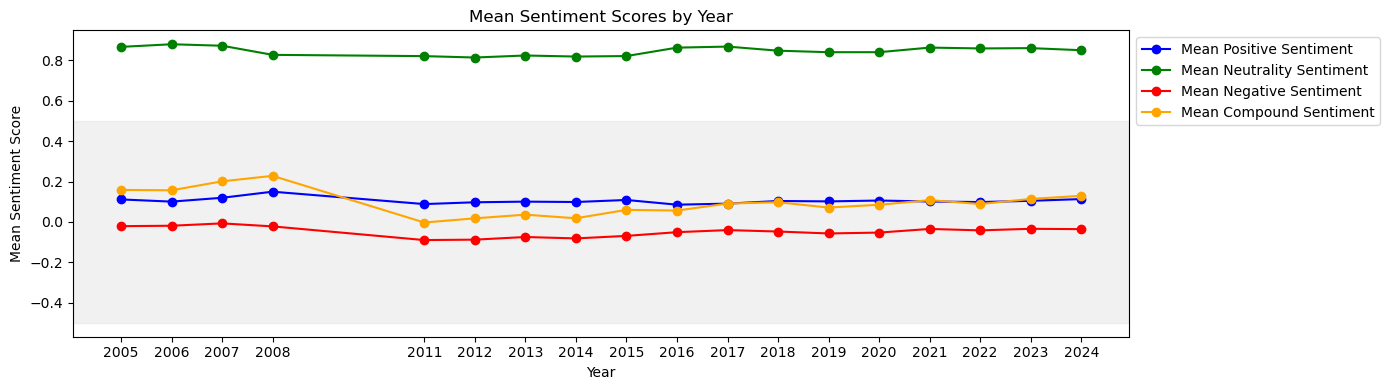

In [8]:
# Create a Figure and an Axes object with larger size
fig, ax = plt.subplots(figsize=(14,4))

# Plot mean positivity
ax.plot(mean_positivity_year['year'], mean_positivity_year['positivity_text'], marker='o', linestyle='-', color='blue', label='Mean Positive Sentiment')

# Plot mean neutrality
ax.plot(mean_neutrality_year['year'], mean_neutrality_year['neutrality_text'], marker='o', linestyle='-', color='green', label='Mean Neutrality Sentiment')

# Plot mean negativity (display as negative values)
ax.plot(mean_negativity_year['year'], -mean_negativity_year['negativity_text'], marker='o', linestyle='-', color='red', label='Mean Negative Sentiment')

# Plot mean compound
ax.plot(mean_compound_year['year'], mean_compound_year['compound_text'], marker='o', linestyle='-', color='orange', label='Mean Compound Sentiment')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add a light grey shaded area from -0.5 to +0.5 on the y-axis
ax.axhspan(-0.5, 0.5, color='lightgrey', alpha=0.3)

# Labeling and titling
ax.set_xlabel('Year')
ax.set_ylabel('Mean Sentiment Score')
ax.set_title('Mean Sentiment Scores by Year')

# Set x-axis ticks to display every year
ax.set_xticks(mean_positivity_year['year'])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [9]:
# summary statistics for the yearly positivity
df_positivity_year_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 'month','neutrality_text', 
                 'negativity_text', 'compound_text' ]).groupby('year').describe()

# print LaTeX
print(df_positivity_year_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{positivity_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
year &  &  &  &  &  &  &  &  \\
\midrule
2005 & 177.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.5 \\
2006 & 139.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.5 \\
2007 & 113.0 & 0.1 & 0.2 & 0.0 & 0.0 & 0.0 & 0.2 & 0.5 \\
2008 & 57.0 & 0.1 & 0.2 & 0.0 & 0.0 & 0.1 & 0.3 & 0.7 \\
2011 & 502.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.7 \\
2012 & 766.0 & 0.1 & 0.2 & 0.0 & 0.0 & 0.0 & 0.2 & 0.7 \\
2013 & 3288.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
2014 & 2882.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.7 \\
2015 & 2321.0 & 0.1 & 0.2 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
2016 & 10026.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.7 \\
2017 & 67248.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
2018 & 38970.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.7 \\
2019 & 52557.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
2020 & 69851.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
20

In [10]:
# summary statistics for the yearly neutrality
df_neutrality_year_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 'month','positivity_text',
                 'negativity_text', 'compound_text' ]).groupby('year').describe()
# print LaTeX
print(df_neutrality_year_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{neutrality_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
year &  &  &  &  &  &  &  &  \\
\midrule
2005 & 177.0 & 0.9 & 0.2 & 0.3 & 0.7 & 1.0 & 1.0 & 1.0 \\
2006 & 139.0 & 0.9 & 0.1 & 0.5 & 0.8 & 1.0 & 1.0 & 1.0 \\
2007 & 113.0 & 0.9 & 0.2 & 0.5 & 0.8 & 1.0 & 1.0 & 1.0 \\
2008 & 57.0 & 0.8 & 0.2 & 0.3 & 0.7 & 0.8 & 1.0 & 1.0 \\
2011 & 502.0 & 0.8 & 0.2 & 0.3 & 0.7 & 0.8 & 1.0 & 1.0 \\
2012 & 766.0 & 0.8 & 0.2 & 0.3 & 0.7 & 0.8 & 1.0 & 1.0 \\
2013 & 3288.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.8 & 1.0 & 1.0 \\
2014 & 2882.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.8 & 1.0 & 1.0 \\
2015 & 2321.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.8 & 1.0 & 1.0 \\
2016 & 10026.0 & 0.9 & 0.1 & 0.2 & 0.8 & 0.9 & 1.0 & 1.0 \\
2017 & 67248.0 & 0.9 & 0.1 & 0.2 & 0.8 & 0.9 & 1.0 & 1.0 \\
2018 & 38970.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
2019 & 52557.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.8 & 1.0 & 1.0 \\
2020 & 69851.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.8 & 1.0 & 1.0 \\
20

In [11]:
# summary statistics for the yearly negativity
df_negativity_year_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 
                                            'month','positivity_text','neutrality_text', 'compound_text'
                                           ]).groupby('year').describe()
# print LaTeX
print(df_negativity_year_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{negativity_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
year &  &  &  &  &  &  &  &  \\
\midrule
2005 & 177.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.4 \\
2006 & 139.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.4 \\
2007 & 113.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.3 \\
2008 & 57.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.3 \\
2011 & 502.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.5 \\
2012 & 766.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.6 \\
2013 & 3288.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.7 \\
2014 & 2882.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.6 \\
2015 & 2321.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.1 & 0.6 \\
2016 & 10026.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.1 & 0.7 \\
2017 & 67248.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
2018 & 38970.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
2019 & 52557.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.1 & 0.6 \\
2020 & 69851.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
20

# Sentimental for each month

In [12]:
# compute the means for each month
mean_positivity_month = df.groupby('month')['positivity_text'].mean().reset_index()
mean_neutrality_month = df.groupby('month')['neutrality_text'].mean().reset_index()
mean_negativity_month = df.groupby('month')['negativity_text'].mean().reset_index()
mean_compound_month = df.groupby('month')['compound_text'].mean().reset_index()

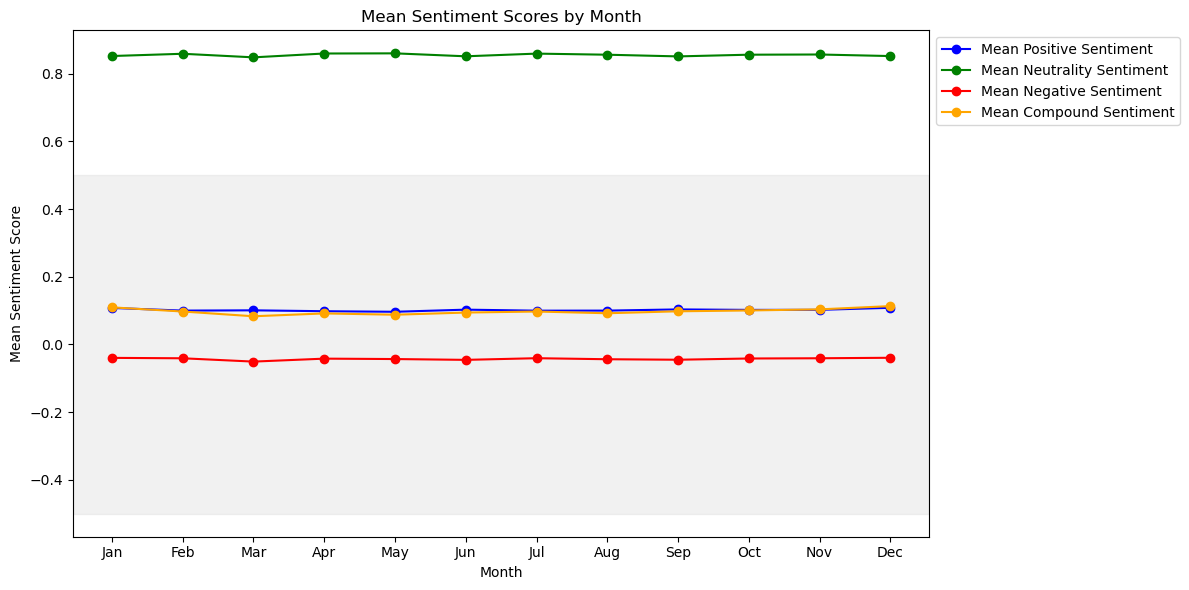

In [13]:
# Create a Figure and an Axes object with larger size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot mean positivity
ax.plot(mean_positivity_month['month'], mean_positivity_month['positivity_text'], marker='o', linestyle='-', color='blue', label='Mean Positive Sentiment')

# Plot mean neutrality
ax.plot(mean_neutrality_month['month'], mean_neutrality_month['neutrality_text'], marker='o', linestyle='-', color='green', label='Mean Neutrality Sentiment')

# Plot mean negativity (display as negative values)
ax.plot(mean_negativity_month['month'], -mean_negativity_month['negativity_text'], marker='o', linestyle='-', color='red', label='Mean Negative Sentiment')

# Plot mean compound
ax.plot(mean_compound_month['month'], mean_compound_month['compound_text'], marker='o', linestyle='-', color='orange', label='Mean Compound Sentiment')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add a light grey shaded area from -0.5 to +0.5 on the y-axis
ax.axhspan(-0.5, 0.5, color='lightgrey', alpha=0.3)

# Labeling and titling
ax.set_xlabel('Month')
ax.set_ylabel('Mean Sentiment Score')
ax.set_title('Mean Sentiment Scores by Month')

# Set x-axis ticks to display every month
ax.set_xticks(mean_positivity_month['month'])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [14]:
# summary statistics for the monthly positivity
df_positivity_month_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 
                                            'year','negativity_text','neutrality_text', 'compound_text'
                                           ]).groupby('month').describe()
# print LaTeX
print(df_positivity_month_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{positivity_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
month &  &  &  &  &  &  &  &  \\
\midrule
1 & 49826.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
2 & 53596.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
3 & 51201.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
4 & 63913.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
5 & 52063.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
6 & 44105.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
7 & 48585.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
8 & 42119.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
9 & 37643.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.7 \\
10 & 55372.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
11 & 44777.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
12 & 38507.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
\bottomrule
\end{tabular}



In [15]:
# summary statistics for the monthly neutrality
df_neutrality_month_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 
                                            'year','negativity_text','positivity_text', 'compound_text'
                                           ]).groupby('month').describe()
# print LaTeX
print(df_neutrality_month_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{neutrality_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
month &  &  &  &  &  &  &  &  \\
\midrule
1 & 49826.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
2 & 53596.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
3 & 51201.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
4 & 63913.0 & 0.9 & 0.2 & 0.2 & 0.8 & 0.9 & 1.0 & 1.0 \\
5 & 52063.0 & 0.9 & 0.2 & 0.2 & 0.8 & 0.9 & 1.0 & 1.0 \\
6 & 44105.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
7 & 48585.0 & 0.9 & 0.2 & 0.2 & 0.8 & 0.9 & 1.0 & 1.0 \\
8 & 42119.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
9 & 37643.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
10 & 55372.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
11 & 44777.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
12 & 38507.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
\bottomrule
\end{tabular}



In [16]:
# summary statistics for the monthly negativity
df_negativity_month_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 
                                            'year','positivity_text','neutrality_text', 'compound_text'
                                           ]).groupby('month').describe()
# print LaTeX
print(df_negativity_month_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{negativity_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
month &  &  &  &  &  &  &  &  \\
\midrule
1 & 49826.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
2 & 53596.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
3 & 51201.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
4 & 63913.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
5 & 52063.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.6 \\
6 & 44105.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
7 & 48585.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
8 & 42119.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
9 & 37643.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
10 & 55372.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
11 & 44777.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
12 & 38507.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
\bottomrule
\end{tabular}



# Sentimental for top50 stocks in the SP500

In [23]:
df_top50 = pd.read_csv('./weights_sp500.csv')
df_top50.rename(columns={'Unnamed: 0' : 'stock'}, inplace=True)
df_top50['stock'] = df_top50['stock'].str.lower()
df_top50.rename(columns={'stock':'ticker'}, inplace = True)
df_top50.head()

,ticker,weight
0,aapl,0.100563
1,msft,0.085854
2,amzn,0.067343
3,brk,0.039403
4,goog,0.035115


Create weight column, which weight computed previously

In [24]:
# Perform left merge to assign weights
df_merged = pd.merge(df, df_top50, on='ticker', how='left')

# Fill NaN weights with 0
df_merged['weight'].fillna(0, inplace=True)


In [26]:
df_merged.to_csv('sp500_news_and_sentimental_weights.csv')